In [1]:
import pandas as pd


In [3]:
df=pd.read_csv('/content/boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [5]:
x=df.drop('MEDV',axis=1)
y=df['MEDV']

In [6]:
import numpy as np

In [7]:
x=np.array(x)
y=np.array(y).reshape(-1,1)

In [8]:
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [14]:
from sklearn.neighbors import KNeighborsRegressor

In [15]:
param_grid = {'n_neighbors': list(range(1, 10))}

In [17]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train.ravel())

print(f"Best K value: {grid_search.best_params_['n_neighbors']}")
print(f"Best CV score: {grid_search.best_score_}")

Best K value: 2
Best CV score: -15.824007175925924


In [20]:
from sklearn.metrics import mean_squared_error

# Get the best estimator from grid_search
best_knn_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn_model.predict(x_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print the Mean Squared Error
print(f"Test Set Mean Squared Error: {mse:.4f}")

Test Set Mean Squared Error: 16.1115


In [23]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)

print(f"Test Set RMSE: {rmse:.4f}")
print(f"Test Set R2 Score: {r2:.4f}")

Test Set RMSE: 4.0139
Test Set R2 Score: 0.7803


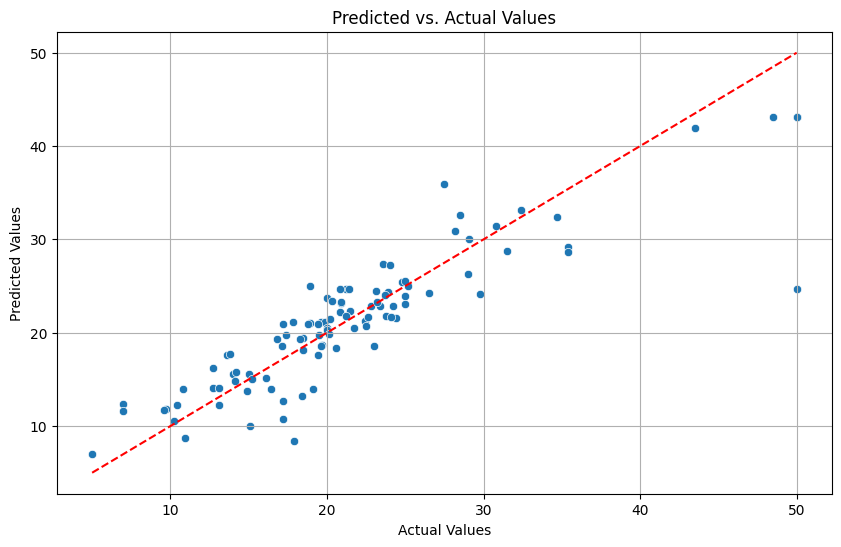

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.flatten(), y=y_pred.flatten())
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Plotting the ideal line
plt.grid(True)
plt.show()

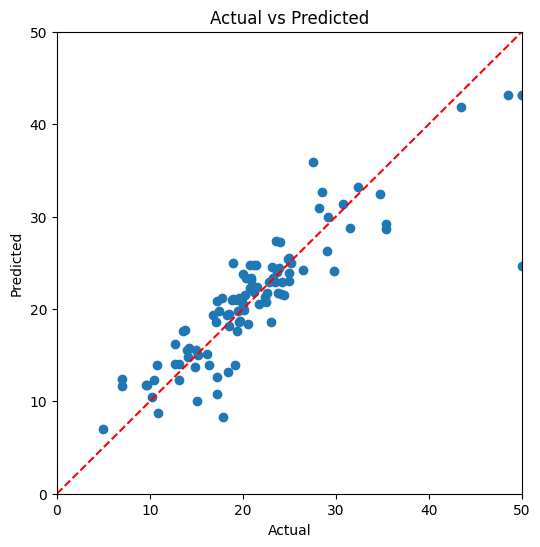

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)
max_val=max(y_test.max(),y_pred.max())

plt.plot([0,max_val],[0,max_val],color='red',linestyle="--")

plt.xlim(0,max_val)
plt.ylim(0,max_val)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()